In [242]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as stats
import numpy as np
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm 
import seaborn as sns
from seaborn_qqplot import QQPlot
from matplotlib import pyplot as plt
from scipy.stats import gamma
from sklearn.preprocessing import StandardScaler
import pickle 
from sklearn.metrics import mean_squared_error
#-------Importing tensorflow libraries-------#
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
#------split and pipeline libraries------#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
#--------------------------------------------------#
from statsmodels.stats.outliers_influence import variance_inflation_factor 
sns.set(color_codes=True)
%matplotlib inline

In [243]:
df  = pd.read_csv("Part- 1,2&3 - Signal.csv")

In [244]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [245]:
df.isnull().any()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

In [246]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
Parameter 1        1599 non-null float64
Parameter 2        1599 non-null float64
Parameter 3        1599 non-null float64
Parameter 4        1599 non-null float64
Parameter 5        1599 non-null float64
Parameter 6        1599 non-null float64
Parameter 7        1599 non-null float64
Parameter 8        1599 non-null float64
Parameter 9        1599 non-null float64
Parameter 10       1599 non-null float64
Parameter 11       1599 non-null float64
Signal_Strength    1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Univariate Analysis

In [247]:
df.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

### Distribution plots for each continous parameters

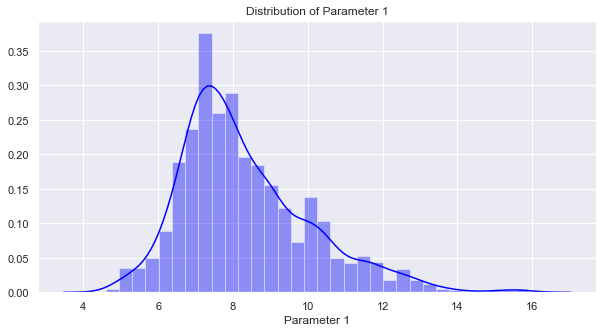

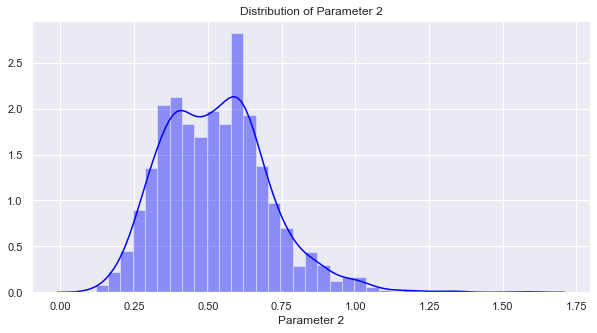

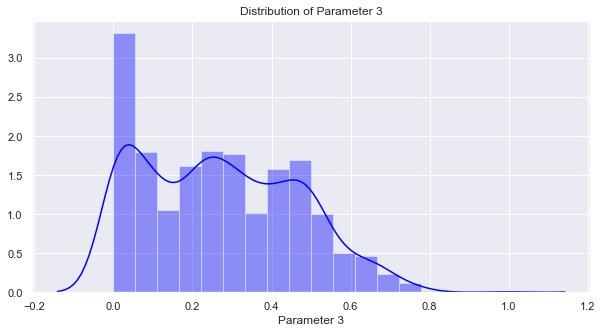

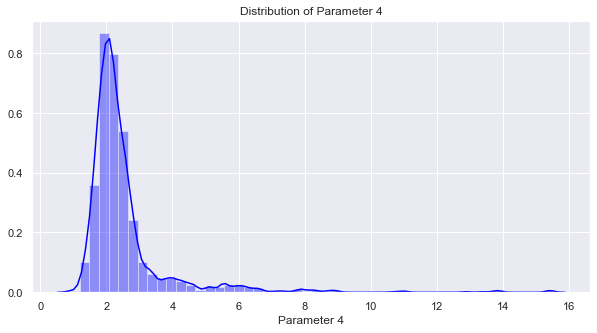

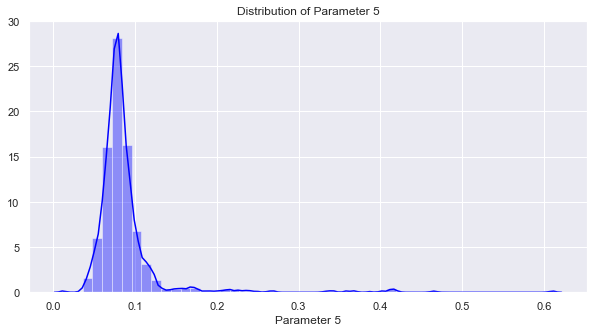

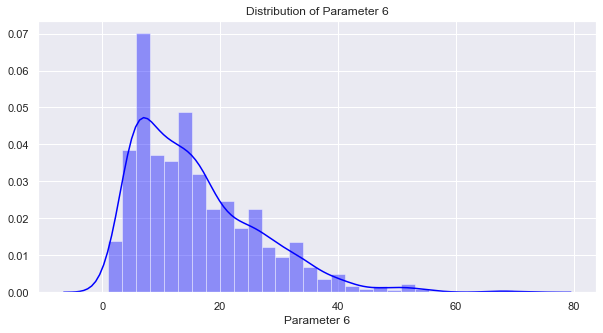

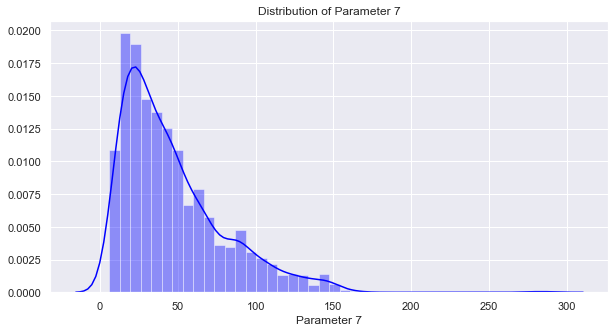

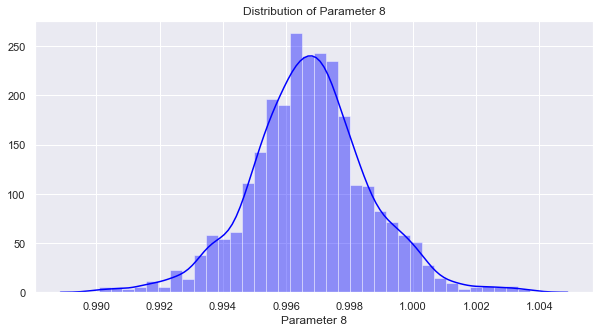

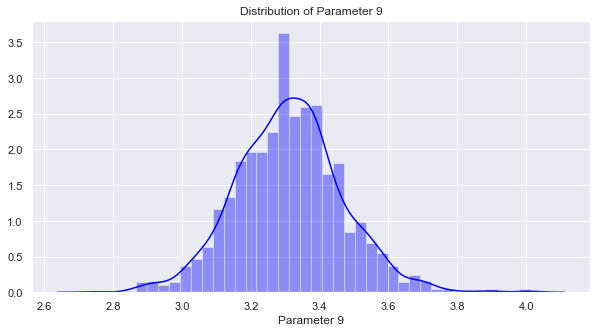

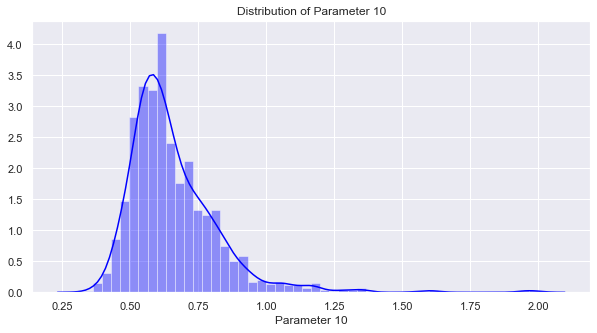

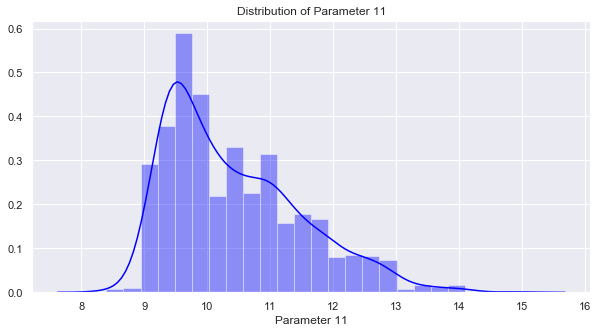

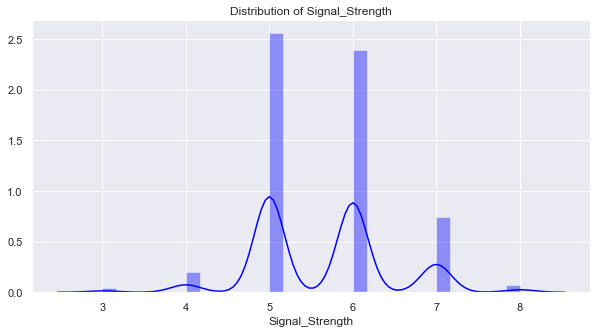

In [248]:
columns = list(df.columns)
for column in columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(df[column], color = "blue").set_title("Distribution of "+column)

### Box plot of each parameter with respect to the signal strength

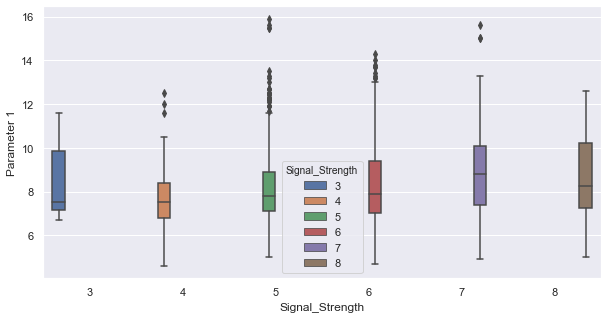

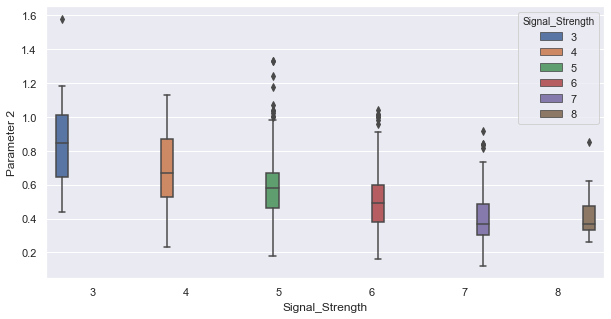

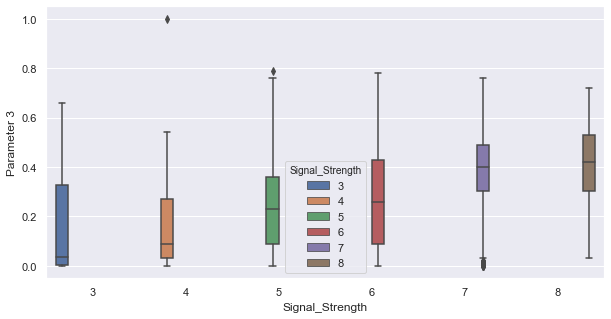

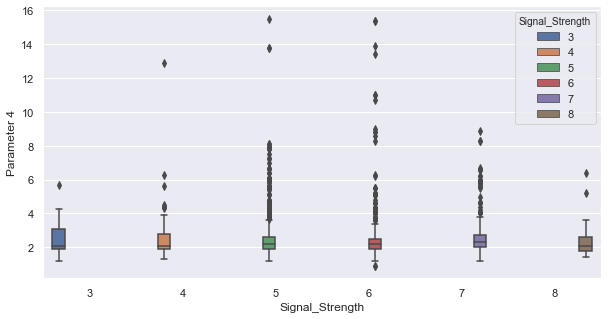

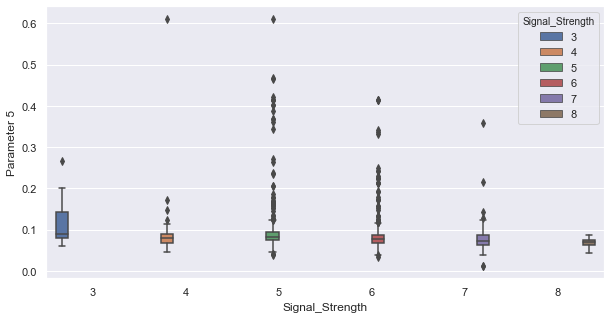

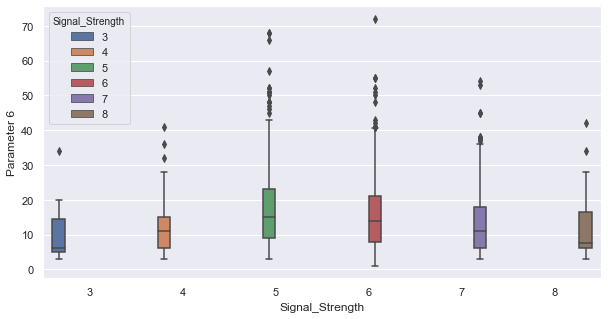

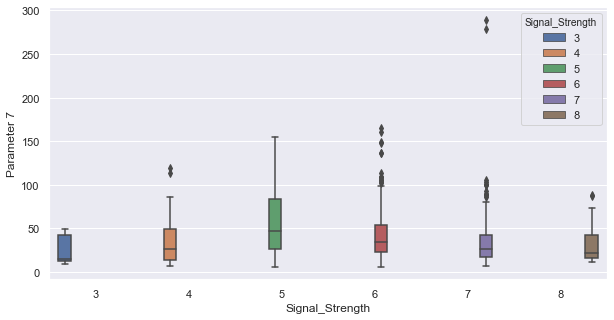

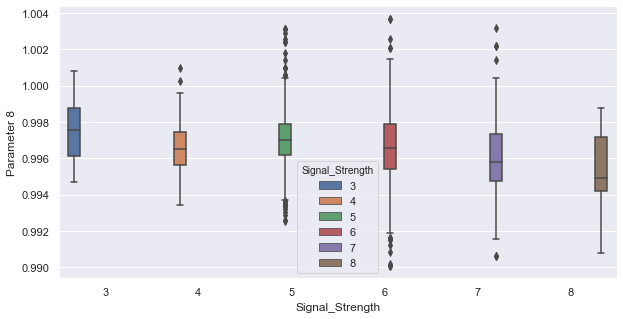

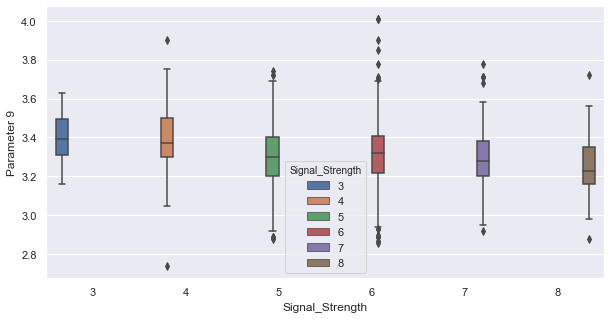

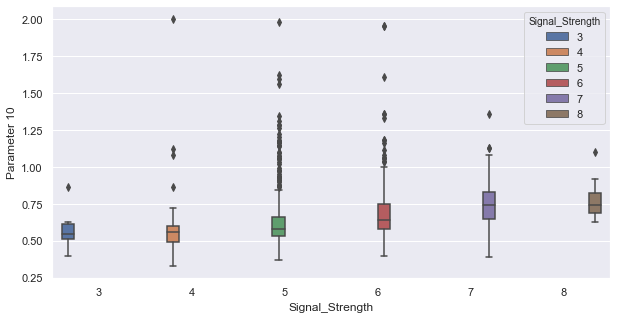

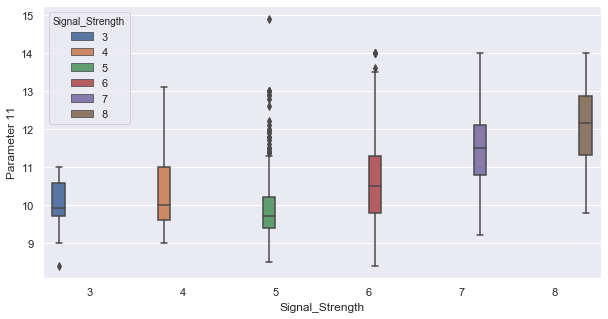

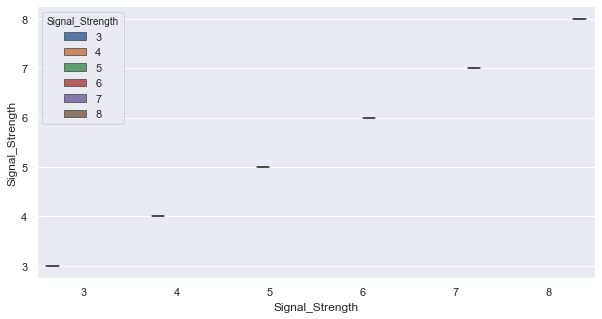

In [249]:
for column in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Signal_Strength',y=column, data = df, hue = 'Signal_Strength')
    

### Calculating median , mode ,skewness and kurtosis

In [250]:
for column in df.columns:
    print(100*"*")
    print("Mean of "+str(column)+"="+str(df[column].mean()))
    print("Median of "+str(column)+"="+str(df[column].median()))
    print("Mode of "+str(column)+"="+str(df[column].mode()[0]))
    print("Skewness in "+str(column)+"="+str(df[column].skew()))
    print("Excess Kurtosis in "+str(column)+"="+str(df[column].kurtosis()))
    print(100*"*")


****************************************************************************************************
Mean of Parameter 1=8.319637273295838
Median of Parameter 1=7.9
Mode of Parameter 1=7.2
Skewness in Parameter 1=0.9827514413284587
Excess Kurtosis in Parameter 1=1.1321433977276252
****************************************************************************************************
****************************************************************************************************
Mean of Parameter 2=0.5278205128205131
Median of Parameter 2=0.52
Mode of Parameter 2=0.6
Skewness in Parameter 2=0.6715925723840199
Excess Kurtosis in Parameter 2=1.2255422501791422
****************************************************************************************************
****************************************************************************************************
Mean of Parameter 3=0.2709756097560964
Median of Parameter 3=0.26
Mode of Parameter 3=0.0
Skewness in Parameter 3=0.318337295254636

<b>Observations:</b><li>Our dataset has outliers as per the boxplot<li>From the above statistics it can be inferred that Parameters 8 and 9 are normally distributed which can be visually confirmed after we go through the distribution plots of the aforementioned parameters.

## Multivariate Analysis

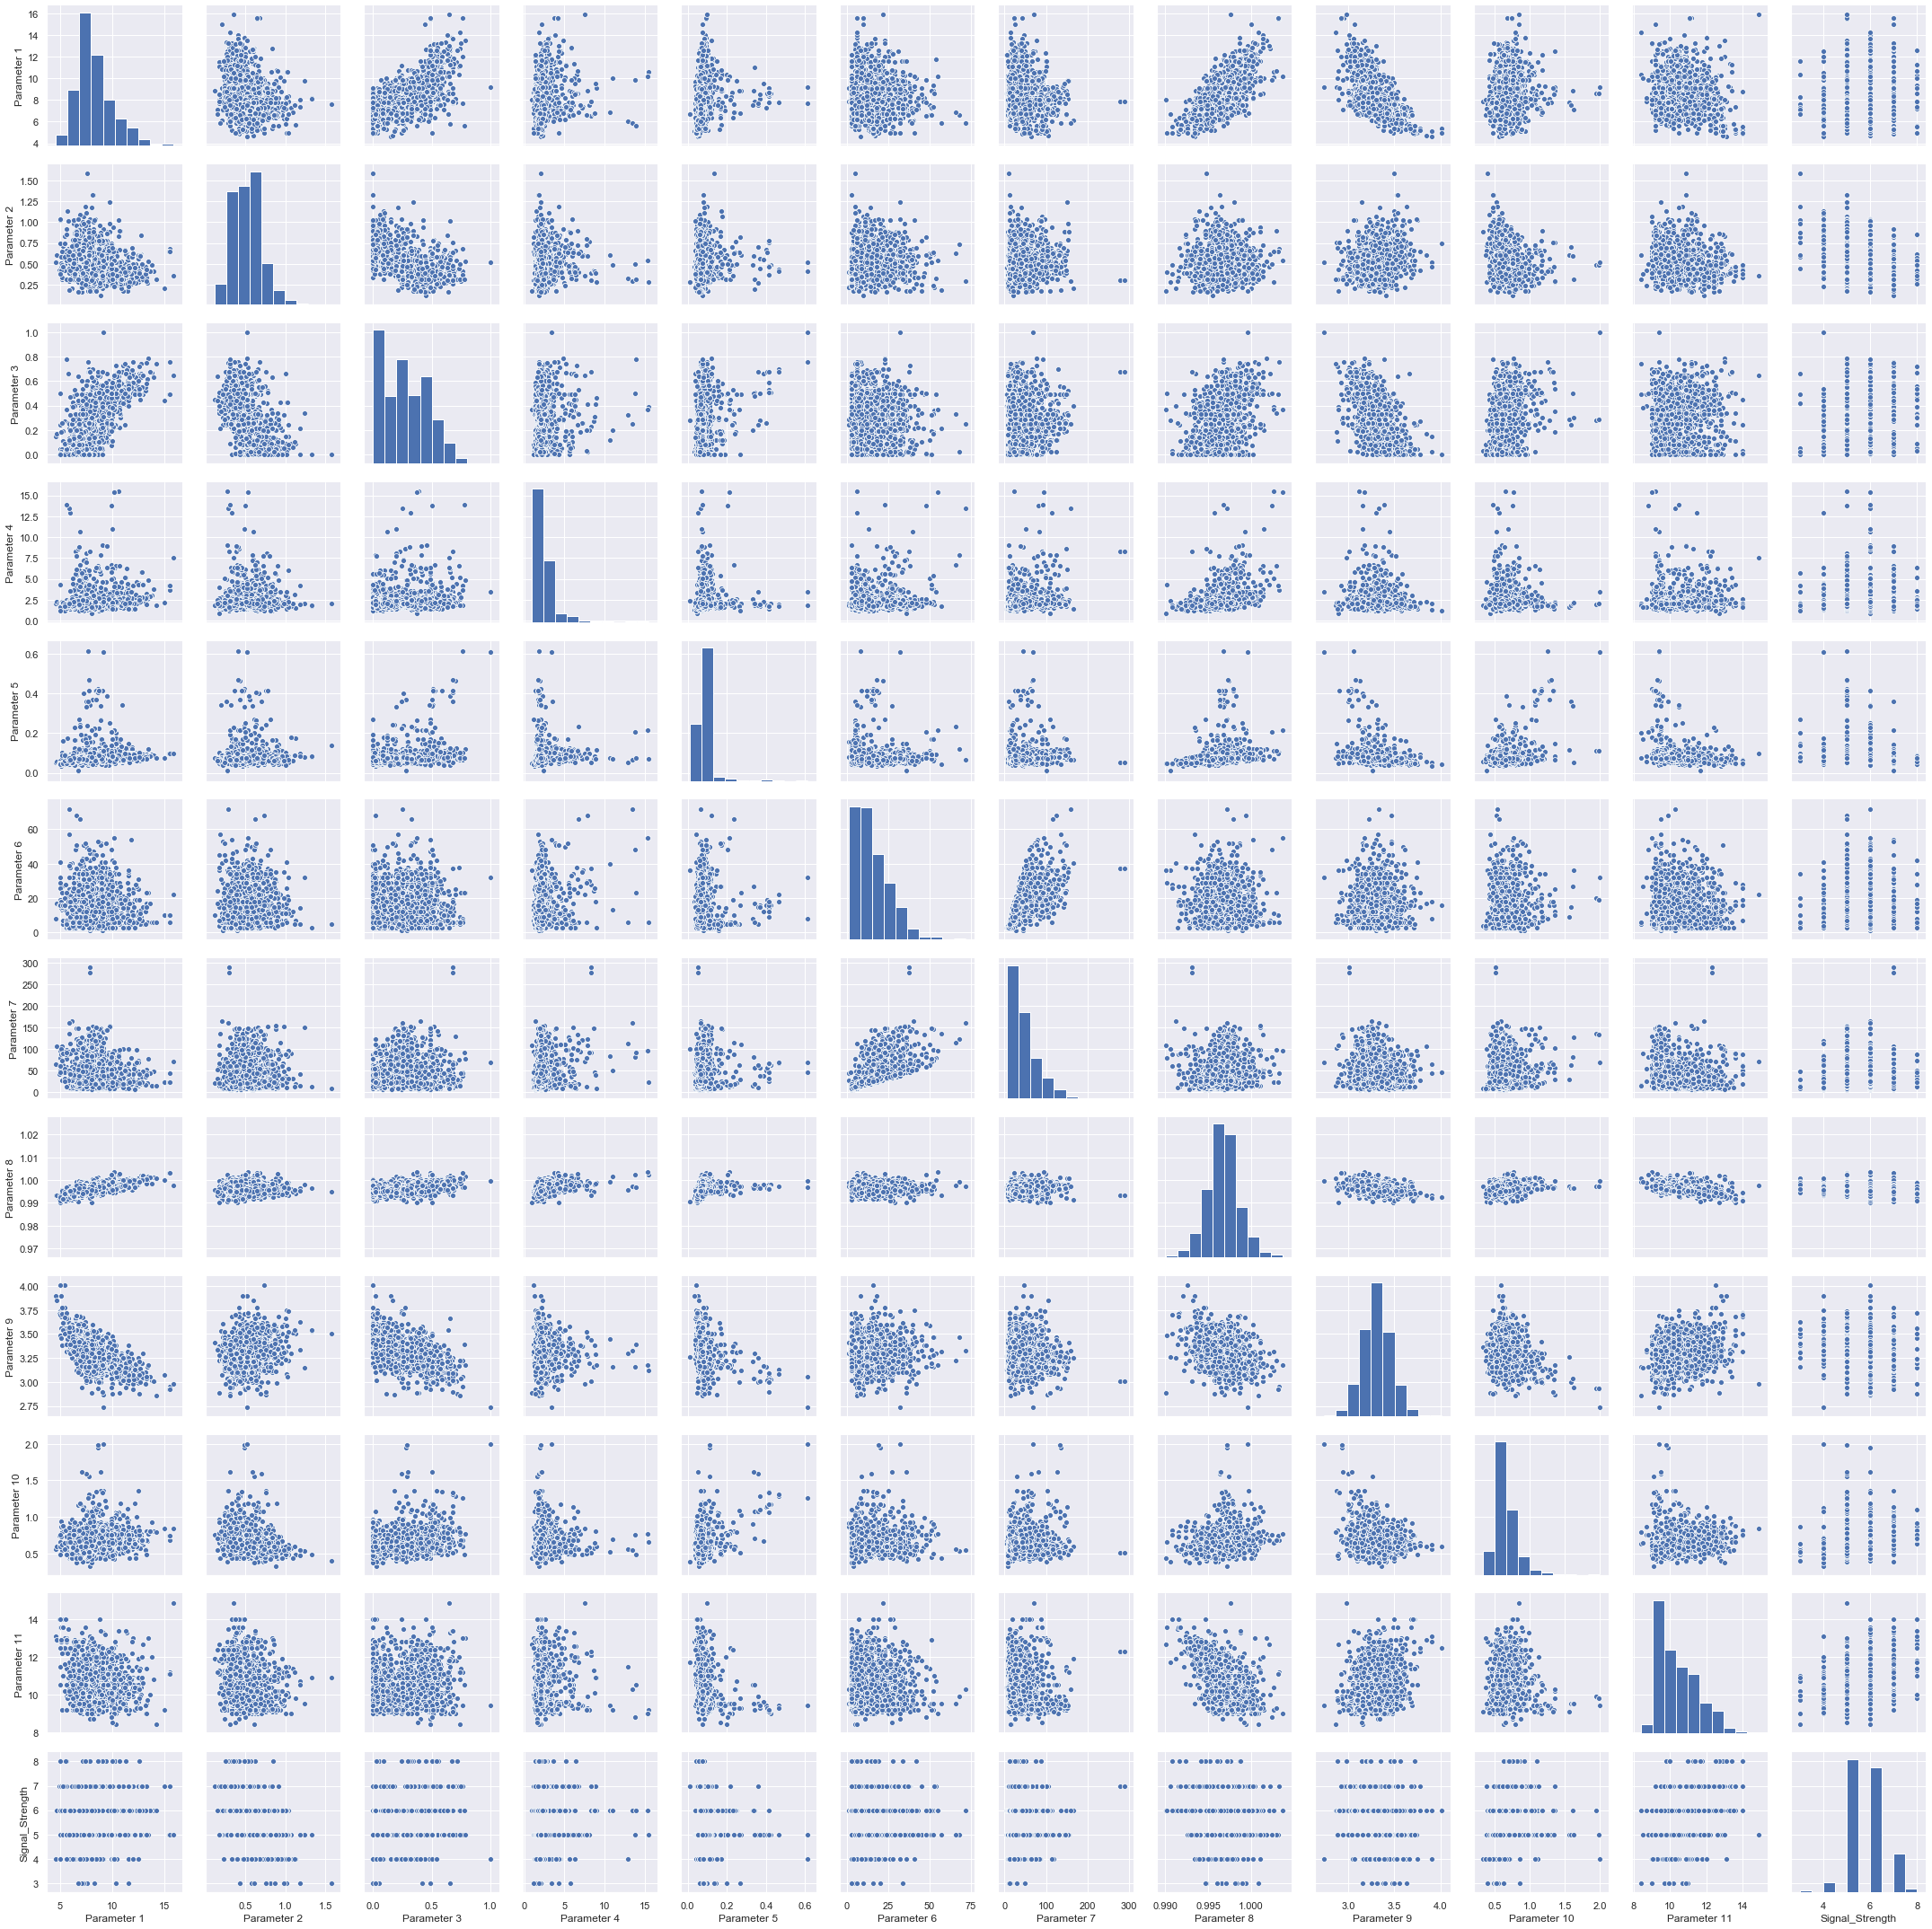

In [59]:
sns.pairplot(df)

<b>Observation:</b>We can see some correlation between parameter 1 and parameter 8 but we need to check the correlation statistically

### Let us impute outliers detected through z-score method  with median

In [251]:
df1 = df.copy()

In [252]:
for column in df1.drop(columns=['Signal_Strength']).columns:
    df1[column] = df1[column].apply(lambda x: x if
                        ((x - df1[column].mean())/df1[column].std()) <= 3 
                        else
                        df1[column].median()
                        #np.nan
                       )

## Correlation Test

### Backward elimination method

In [253]:
def backwardElimination(x, Y, significance_level, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > significance_level:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [254]:
x_ols = df1.drop(columns=['Signal_Strength']).values
y_ols = df1['Signal_Strength']
significance_level = 0.05
selected_columns = df1.drop(columns=['Signal_Strength']).columns
data, selected_columns = backwardElimination(x_ols, y_ols, significance_level, selected_columns)

In [255]:
selected_columns

Index(['Parameter 2', 'Parameter 5', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11'],
      dtype='object')

In [256]:
selected_columns = list(selected_columns)
selected_columns.append('Signal_Strength')
After_backward_elimination = df[selected_columns].copy()

(7.0, 0.0)

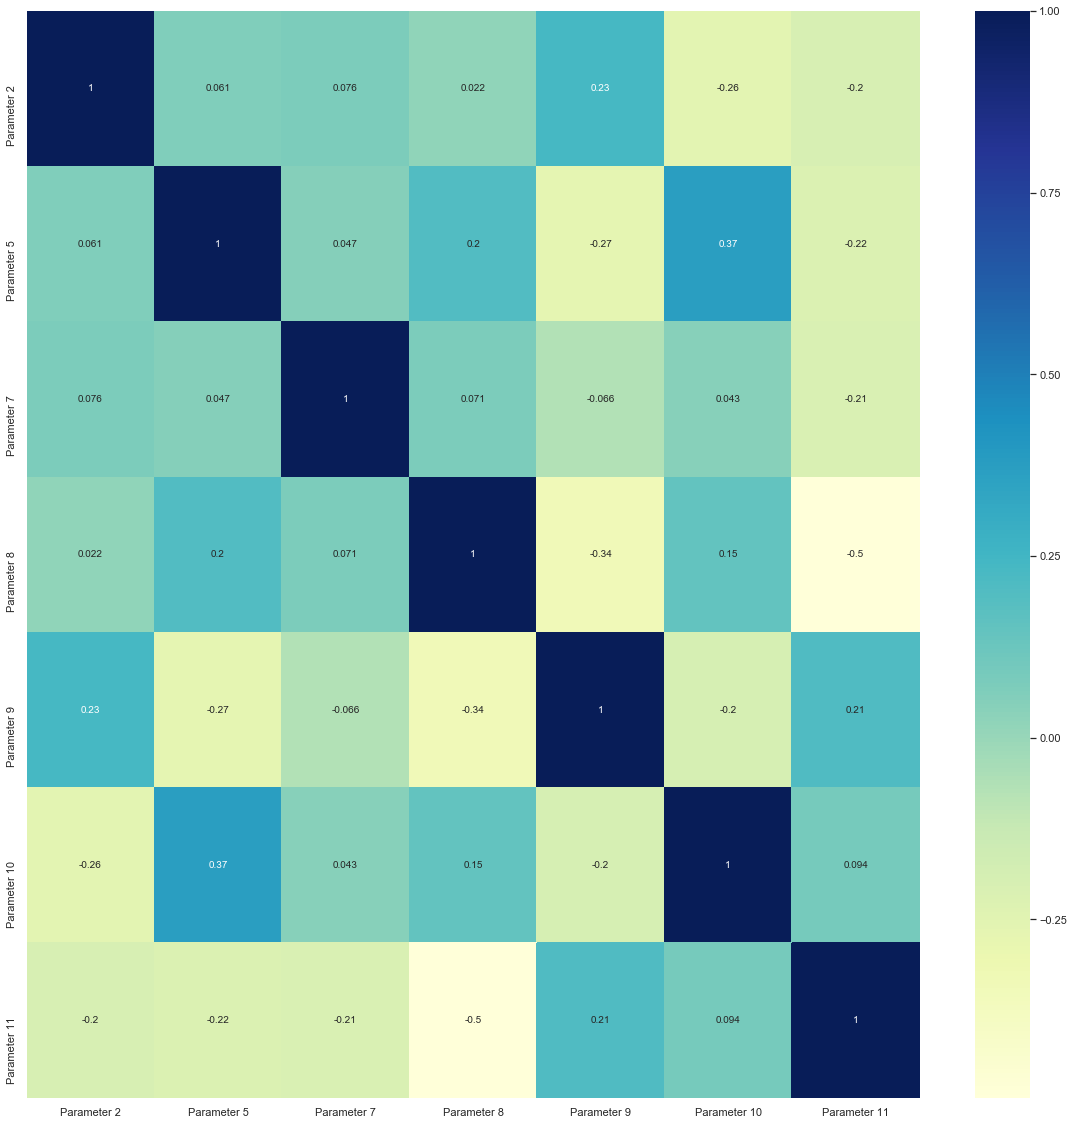

In [257]:
plt.figure(figsize=(20, 20))
df_corr = After_backward_elimination.drop(columns=['Signal_Strength']).corr(method='pearson')
ax = sns.heatmap(df_corr, annot=True, cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<b>Observations:</b><li>From the backward elimination method we can observe that Parameter 1, Parameter 3, Parameter 4 and Parameter 6 have been dropped due to high correlation.<li>The spearman correlation matrix which we created after removing highly correlated features through backward elimination method do not show any highly correlated feature.<li>We will also use VIF scores to further analyse the correlation in our dataset.

### Variance Inflation factor

In [258]:
X = df.drop(columns=['Signal_Strength'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [259]:
vif_data

feature          VIF
0    Parameter 1    74.452265
1    Parameter 2    17.060026
2    Parameter 3     9.183495
3    Parameter 4     4.662992
4    Parameter 5     6.554877
5    Parameter 6     6.442682
6    Parameter 7     6.519699
7    Parameter 8  1479.287209
8    Parameter 9  1070.967685
9   Parameter 10    21.590621
10  Parameter 11   124.394866

### Pairplot after removing outliers

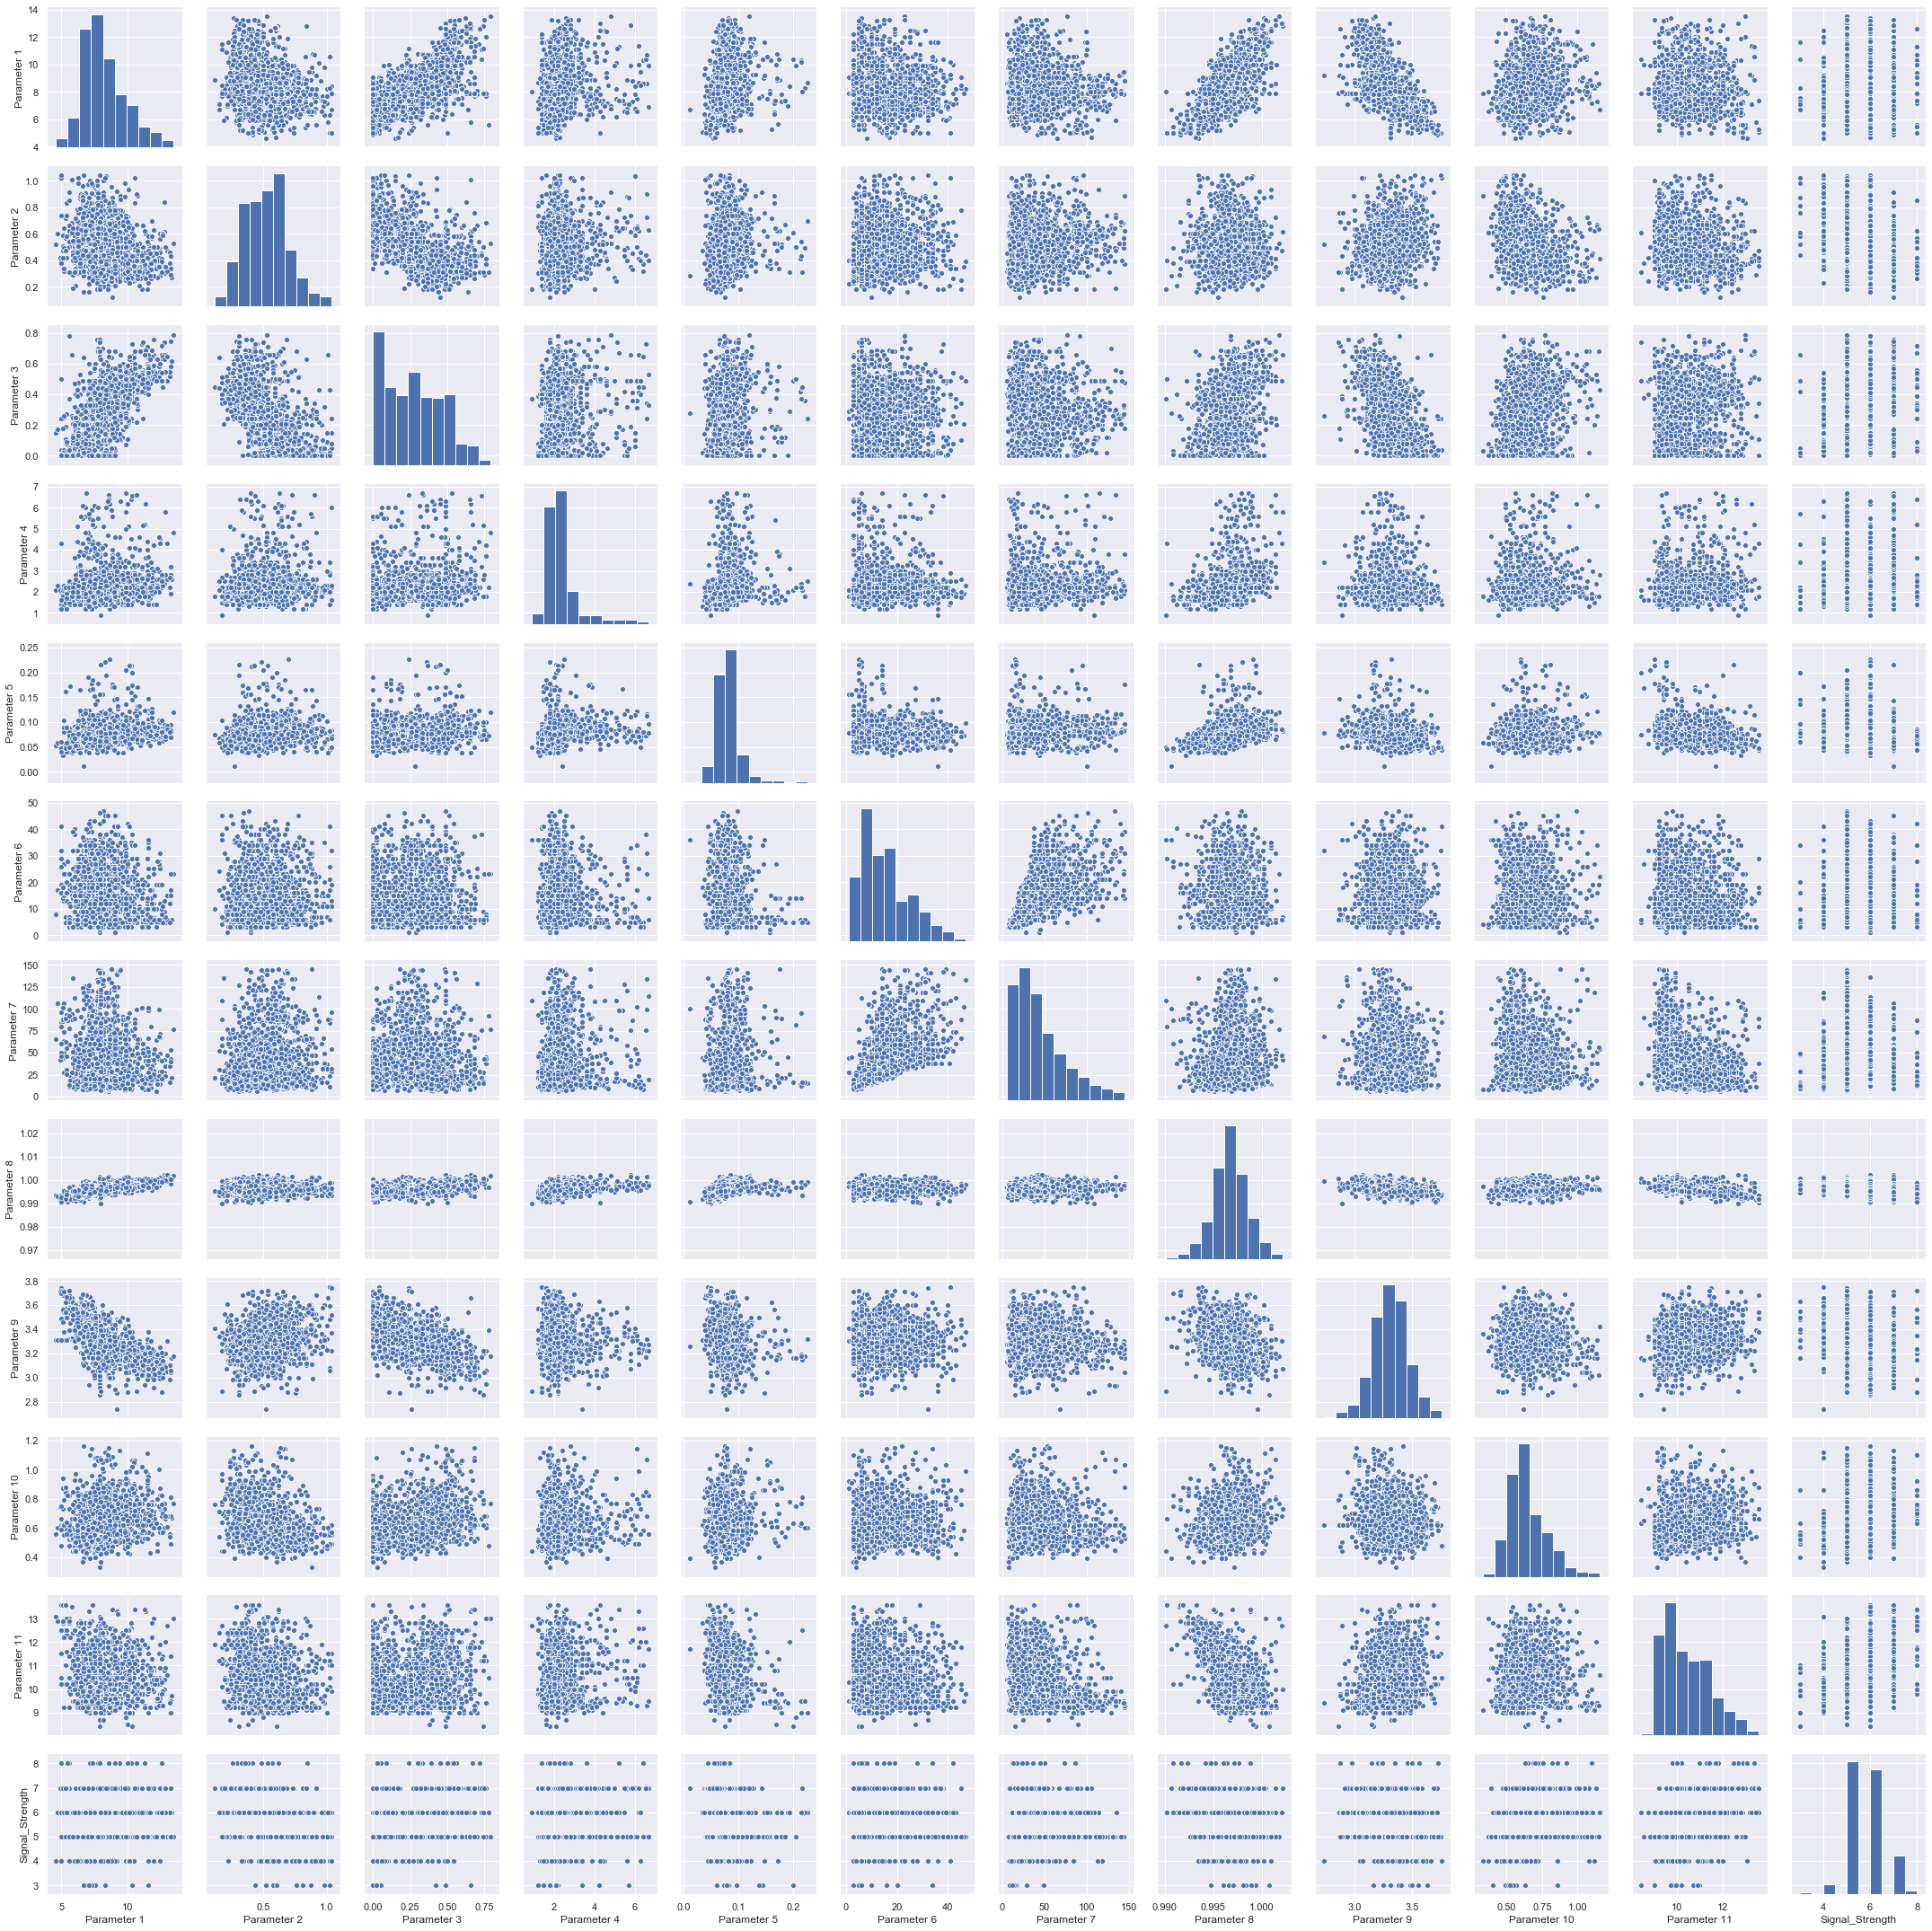

In [260]:
sns.pairplot(df1)

In [261]:
X = df1.drop(columns=['Signal_Strength'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [262]:
vif_data

feature          VIF
0    Parameter 1    67.525613
1    Parameter 2    17.700405
2    Parameter 3     8.259058
3    Parameter 4     9.553091
4    Parameter 5    16.211930
5    Parameter 6     6.542079
6    Parameter 7     6.370576
7    Parameter 8  1331.472877
8    Parameter 9   960.386214
9   Parameter 10    29.009573
10  Parameter 11   133.234695

<b>Observations:</b><li>After treating outliers we did not see much improvement in the VIF scores of the parameters.They continue to be very high(>5)<li>In order to solve multicolinearity problem we will use PCA.

### Standard Scaling

In [263]:
scaled = df1.copy()
for column in scaled.drop(columns=['Signal_Strength']).columns:
    scaled[column] = scaled[column].apply(lambda x:
                        (x - scaled[column].mean())/scaled[column].std()
                       )

### Finding the optimal number of principal components that could account for maximum variance in data

In [264]:
from sklearn.decomposition import PCA
features = list(scaled.drop(columns=['Signal_Strength']).columns)
pca = PCA(n_components=10)
pca.fit(np.array(scaled[features]))
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance,decimals = 3)*100)
var

array([27.4, 45.1, 59.4, 69.7, 77.9, 84.7, 89.9, 94. , 97. , 99.1])

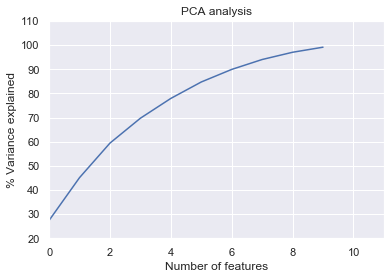

In [265]:
plt.ylabel("% Variance explained")
plt.xlabel("Number of features")
plt.title("PCA analysis")
plt.ylim(20,110)
plt.xlim(0,11)
plt.plot(var)

<b>Observations:</b> We could pick n_components = 6 as they account for 90% of variance in the dataset

In [266]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(np.array(scaled[features]))
pcDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

In [267]:
finalDf = pd.concat([pcDf,scaled[['Signal_Strength']]], axis=1)

In [269]:
X = finalDf.drop(columns=['Signal_Strength'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [270]:
vif_data

feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0
4     PC5  1.0
5     PC6  1.0

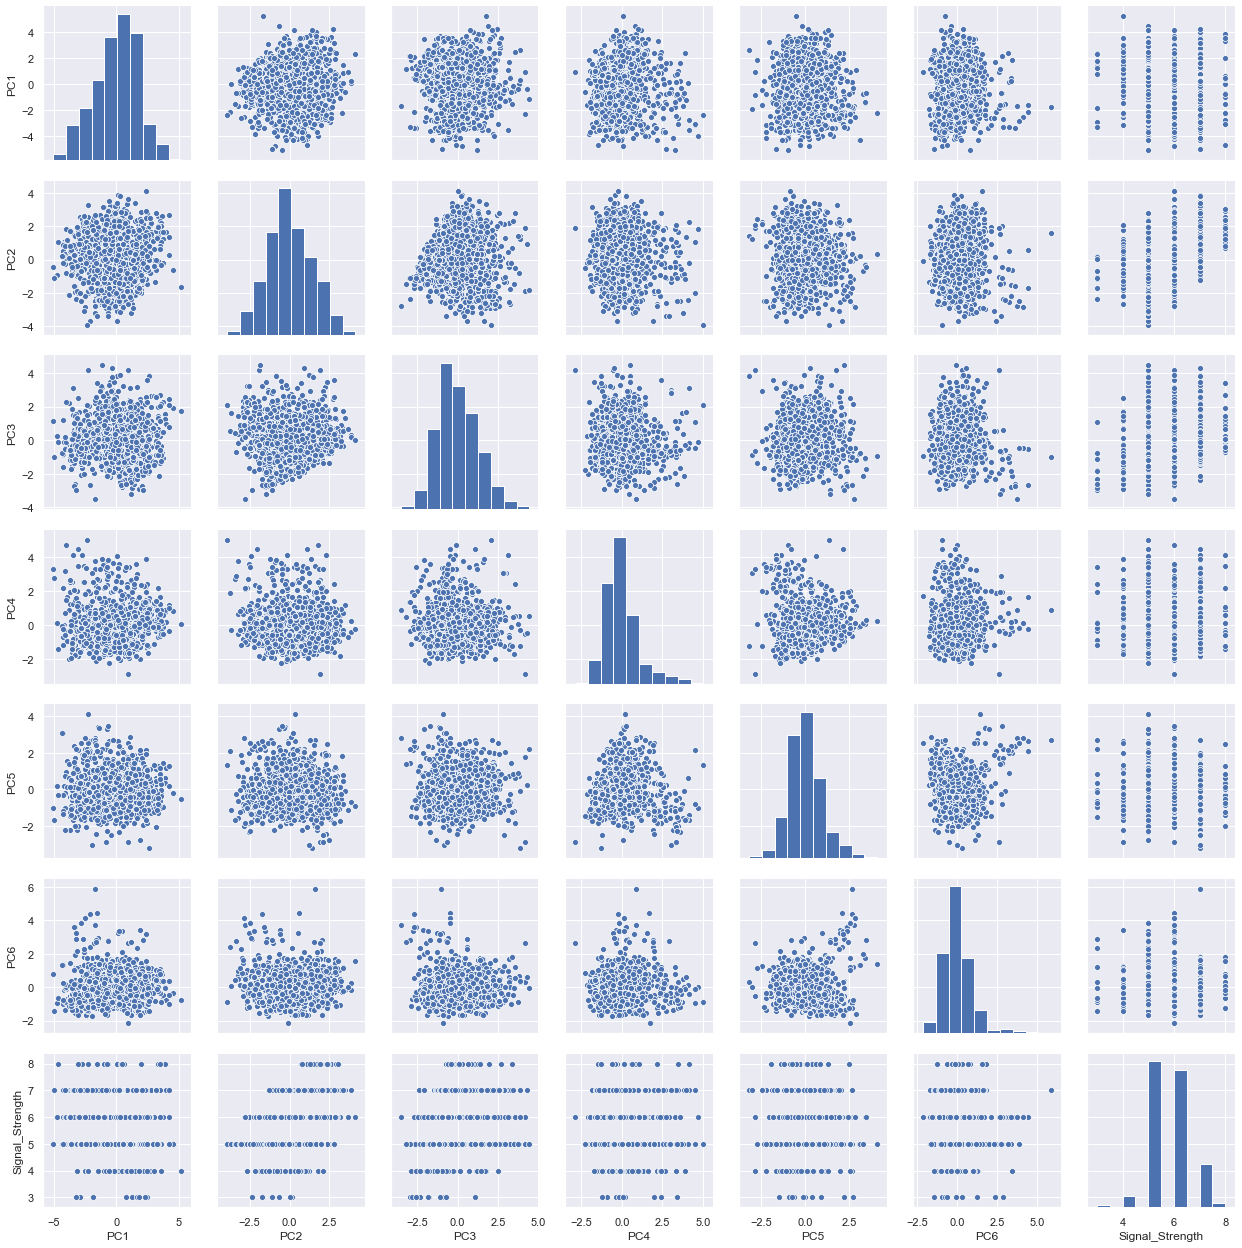

In [271]:
sns.pairplot(finalDf)

#### No correlation among principal components

### Split the data

In [304]:
xpca = finalDf.drop(columns=['Signal_Strength']).values
ypca = finalDf['Signal_Strength'].values
X_train, X_test, y_train, y_test = train_test_split(xpca, ypca,test_size=0.33, random_state=42)

### Training the neural network to create regression model

In [305]:
model = Sequential()
model.add(Dense(10, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 10)                70        
_________________________________________________________________
dropout_30 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_31 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 11        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [306]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [307]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 215 samples
Epoch 1/200
856/856 [==============================] - 1s 707us/sample - loss: 26.6416 - mean_squared_error: 26.6416 - mean_absolute_error: 5.0784 - val_loss: 20.7450 - val_mean_squared_error: 20.7450 - val_mean_absolute_error: 4.4613
Epoch 2/200
856/856 [==============================] - 0s 152us/sample - loss: 14.6958 - mean_squared_error: 14.6958 - mean_absolute_error: 3.5782 - val_loss: 7.6434 - val_mean_squared_error: 7.6434 - val_mean_absolute_error: 2.4951
Epoch 3/200
856/856 [==============================] - 0s 153us/sample - loss: 5.9726 - mean_squared_error: 5.9726 - mean_absolute_error: 2.0134 - val_loss: 2.1598 - val_mean_squared_error: 2.1598 - val_mean_absolute_error: 1.2352
Epoch 4/200
856/856 [==============================] - 0s 155us/sample - loss: 3.9955 - mean_squared_error: 3.9955 - mean_absolute_error: 1.6084 - val_loss: 1.4927 - val_mean_squared_error: 1.4927 - val_mean_absolute_error: 1.0268
Epoch 5/200
856/856 [===

856/856 [==============================] - 0s 162us/sample - loss: 1.6037 - mean_squared_error: 1.6037 - mean_absolute_error: 0.9964 - val_loss: 0.3838 - val_mean_squared_error: 0.3838 - val_mean_absolute_error: 0.4648
Epoch 37/200
856/856 [==============================] - 0s 150us/sample - loss: 1.4778 - mean_squared_error: 1.4778 - mean_absolute_error: 0.9428 - val_loss: 0.3943 - val_mean_squared_error: 0.3943 - val_mean_absolute_error: 0.4747
Epoch 38/200
856/856 [==============================] - 0s 138us/sample - loss: 1.4798 - mean_squared_error: 1.4798 - mean_absolute_error: 0.9551 - val_loss: 0.4481 - val_mean_squared_error: 0.4481 - val_mean_absolute_error: 0.5135
Epoch 39/200
856/856 [==============================] - 0s 148us/sample - loss: 1.4415 - mean_squared_error: 1.4415 - mean_absolute_error: 0.9435 - val_loss: 0.4416 - val_mean_squared_error: 0.4416 - val_mean_absolute_error: 0.4973
Epoch 40/200
856/856 [==============================] - 0s 139us/sample - loss: 1.466

856/856 [==============================] - 0s 140us/sample - loss: 1.1376 - mean_squared_error: 1.1376 - mean_absolute_error: 0.8279 - val_loss: 0.3850 - val_mean_squared_error: 0.3850 - val_mean_absolute_error: 0.4732
Epoch 72/200
856/856 [==============================] - 0s 139us/sample - loss: 1.0178 - mean_squared_error: 1.0178 - mean_absolute_error: 0.8025 - val_loss: 0.3817 - val_mean_squared_error: 0.3817 - val_mean_absolute_error: 0.4678
Epoch 73/200
856/856 [==============================] - 0s 147us/sample - loss: 0.9649 - mean_squared_error: 0.9649 - mean_absolute_error: 0.7635 - val_loss: 0.4022 - val_mean_squared_error: 0.4022 - val_mean_absolute_error: 0.4810
Epoch 74/200
856/856 [==============================] - 0s 140us/sample - loss: 0.9530 - mean_squared_error: 0.9530 - mean_absolute_error: 0.7577 - val_loss: 0.4002 - val_mean_squared_error: 0.4002 - val_mean_absolute_error: 0.4838
Epoch 75/200
856/856 [==============================] - 0s 145us/sample - loss: 1.000

856/856 [==============================] - 0s 146us/sample - loss: 0.7531 - mean_squared_error: 0.7531 - mean_absolute_error: 0.6896 - val_loss: 0.3650 - val_mean_squared_error: 0.3650 - val_mean_absolute_error: 0.4796
Epoch 107/200
856/856 [==============================] - 0s 145us/sample - loss: 0.7392 - mean_squared_error: 0.7392 - mean_absolute_error: 0.6716 - val_loss: 0.3858 - val_mean_squared_error: 0.3858 - val_mean_absolute_error: 0.4812
Epoch 108/200
856/856 [==============================] - 0s 147us/sample - loss: 0.7689 - mean_squared_error: 0.7689 - mean_absolute_error: 0.6900 - val_loss: 0.3654 - val_mean_squared_error: 0.3654 - val_mean_absolute_error: 0.4776
Epoch 109/200
856/856 [==============================] - 0s 154us/sample - loss: 0.7857 - mean_squared_error: 0.7857 - mean_absolute_error: 0.6965 - val_loss: 0.3624 - val_mean_squared_error: 0.3624 - val_mean_absolute_error: 0.4734
Epoch 110/200
856/856 [==============================] - 0s 171us/sample - loss: 0

856/856 [==============================] - 0s 159us/sample - loss: 0.6116 - mean_squared_error: 0.6116 - mean_absolute_error: 0.6077 - val_loss: 0.3647 - val_mean_squared_error: 0.3647 - val_mean_absolute_error: 0.4753
Epoch 142/200
856/856 [==============================] - 0s 154us/sample - loss: 0.5804 - mean_squared_error: 0.5804 - mean_absolute_error: 0.5895 - val_loss: 0.3599 - val_mean_squared_error: 0.3599 - val_mean_absolute_error: 0.4749
Epoch 143/200
856/856 [==============================] - 0s 154us/sample - loss: 0.5907 - mean_squared_error: 0.5907 - mean_absolute_error: 0.6013 - val_loss: 0.3730 - val_mean_squared_error: 0.3730 - val_mean_absolute_error: 0.4829
Epoch 144/200
856/856 [==============================] - 0s 158us/sample - loss: 0.5598 - mean_squared_error: 0.5598 - mean_absolute_error: 0.5767 - val_loss: 0.3635 - val_mean_squared_error: 0.3635 - val_mean_absolute_error: 0.4794
Epoch 145/200
856/856 [==============================] - 0s 150us/sample - loss: 0

856/856 [==============================] - 0s 144us/sample - loss: 0.5240 - mean_squared_error: 0.5240 - mean_absolute_error: 0.5750 - val_loss: 0.3601 - val_mean_squared_error: 0.3601 - val_mean_absolute_error: 0.4755
Epoch 177/200
856/856 [==============================] - 0s 145us/sample - loss: 0.5102 - mean_squared_error: 0.5102 - mean_absolute_error: 0.5582 - val_loss: 0.3645 - val_mean_squared_error: 0.3645 - val_mean_absolute_error: 0.4789
Epoch 178/200
856/856 [==============================] - 0s 134us/sample - loss: 0.5091 - mean_squared_error: 0.5091 - mean_absolute_error: 0.5605 - val_loss: 0.3592 - val_mean_squared_error: 0.3592 - val_mean_absolute_error: 0.4763
Epoch 179/200
856/856 [==============================] - 0s 145us/sample - loss: 0.5197 - mean_squared_error: 0.5197 - mean_absolute_error: 0.5715 - val_loss: 0.3603 - val_mean_squared_error: 0.3603 - val_mean_absolute_error: 0.4775
Epoch 180/200
856/856 [==============================] - 0s 145us/sample - loss: 0

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


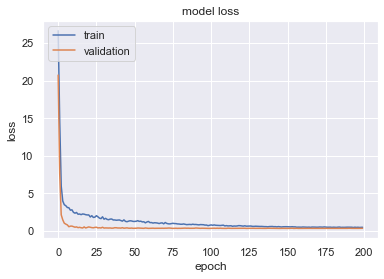

In [308]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [309]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.46068788382694303

<b>Observations:</b><li>We got the mse score of 0.46 when we trained our neural network on the principal components.<li>Next we will try to train our neural network on the dataset that we received after removing correlated features that were detected through backward elimination algorithm

### Training neural net on dataset obtained after backward elimination

In [310]:
for column in After_backward_elimination.drop(columns=['Signal_Strength']).columns:
    After_backward_elimination[column] = After_backward_elimination[column].apply(lambda x:
                        (x - After_backward_elimination[column].mean())/After_backward_elimination[column].std()
                       )

In [311]:
After_backward_elimination

Parameter 2  Parameter 5  Parameter 7  Parameter 8  Parameter 9  \
0        0.961576    -0.243630    -0.379014     0.558100     1.288240   
1        1.966827     0.223805     0.624168     0.028252    -0.719708   
2        1.296660     0.096323     0.228975     0.134222    -0.331073   
3       -1.384011    -0.264878     0.411372     0.664069    -0.978798   
4        0.961576    -0.243630    -0.379014     0.558100     1.288240   
...           ...          ...          ...          ...          ...   
1594     0.403103     0.053829    -0.075020    -0.978459     0.899605   
1595     0.123866    -0.541090     0.137777    -0.861893     1.353012   
1596    -0.099523    -0.243630    -0.196617    -0.533387     0.705287   
1597     0.654416    -0.264878    -0.075020    -0.676446     1.676875   
1598    -1.216469    -0.434854    -0.135818    -0.665849     0.510970   

      Parameter 10  Parameter 11  Signal_Strength  
0        -0.579025     -0.959946                5  
1         0.128910     -0.584594                5  
2        -0.048074     -0.584594                5  
3        -0.461036     -0.584594                6  
4        -0.579025     -0.959946                5  
...            ...           ...              ...  
1594     -0.461036      0.072271                5  
1595      0.600867      0.729136                6  
1596      0.541872      0.541460                6  
1597      0.305894     -0.209243                5  
1598      0.010921      0.541460                6  

[1599 rows x 8 columns]

In [312]:
X = After_backward_elimination.drop(columns=['Signal_Strength']).values
Y = After_backward_elimination['Signal_Strength'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33, random_state=42)

In [313]:
X.shape

(1599, 7)

In [314]:
model1 = Sequential()
model1.add(Dense(10, input_dim=7, kernel_initializer='normal', activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1, activation='linear'))
model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 10)                80        
_________________________________________________________________
dropout_32 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_33 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 11        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [315]:
model1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [316]:
history = model1.fit(X_train, y_train, epochs=200, batch_size=10,  verbose=1, validation_split=0.2)

Train on 856 samples, validate on 215 samples
Epoch 1/200
856/856 [==============================] - 1s 713us/sample - loss: 27.0769 - mean_squared_error: 27.0769 - mean_absolute_error: 5.1202 - val_loss: 21.0025 - val_mean_squared_error: 21.0025 - val_mean_absolute_error: 4.5084
Epoch 2/200
856/856 [==============================] - 0s 153us/sample - loss: 14.2819 - mean_squared_error: 14.2819 - mean_absolute_error: 3.5655 - val_loss: 6.6728 - val_mean_squared_error: 6.6728 - val_mean_absolute_error: 2.4240
Epoch 3/200
856/856 [==============================] - 0s 157us/sample - loss: 5.8012 - mean_squared_error: 5.8012 - mean_absolute_error: 2.0230 - val_loss: 1.7196 - val_mean_squared_error: 1.7196 - val_mean_absolute_error: 1.1247
Epoch 4/200
856/856 [==============================] - 0s 166us/sample - loss: 3.6995 - mean_squared_error: 3.6995 - mean_absolute_error: 1.5689 - val_loss: 0.9809 - val_mean_squared_error: 0.9809 - val_mean_absolute_error: 0.7907
Epoch 5/200
856/856 [===

856/856 [==============================] - 0s 153us/sample - loss: 1.5220 - mean_squared_error: 1.5220 - mean_absolute_error: 0.9721 - val_loss: 0.3852 - val_mean_squared_error: 0.3852 - val_mean_absolute_error: 0.4673
Epoch 37/200
856/856 [==============================] - 0s 137us/sample - loss: 1.5409 - mean_squared_error: 1.5409 - mean_absolute_error: 0.9872 - val_loss: 0.3771 - val_mean_squared_error: 0.3771 - val_mean_absolute_error: 0.4640
Epoch 38/200
856/856 [==============================] - 0s 139us/sample - loss: 1.5172 - mean_squared_error: 1.5172 - mean_absolute_error: 0.9738 - val_loss: 0.3866 - val_mean_squared_error: 0.3866 - val_mean_absolute_error: 0.4750
Epoch 39/200
856/856 [==============================] - 0s 141us/sample - loss: 1.4369 - mean_squared_error: 1.4369 - mean_absolute_error: 0.9417 - val_loss: 0.3820 - val_mean_squared_error: 0.3820 - val_mean_absolute_error: 0.4695
Epoch 40/200
856/856 [==============================] - 0s 146us/sample - loss: 1.475

856/856 [==============================] - 0s 155us/sample - loss: 1.0049 - mean_squared_error: 1.0049 - mean_absolute_error: 0.7845 - val_loss: 0.3320 - val_mean_squared_error: 0.3320 - val_mean_absolute_error: 0.4424
Epoch 72/200
856/856 [==============================] - 0s 145us/sample - loss: 0.9582 - mean_squared_error: 0.9582 - mean_absolute_error: 0.7731 - val_loss: 0.3633 - val_mean_squared_error: 0.3633 - val_mean_absolute_error: 0.4601
Epoch 73/200
856/856 [==============================] - 0s 148us/sample - loss: 1.0058 - mean_squared_error: 1.0058 - mean_absolute_error: 0.7918 - val_loss: 0.3568 - val_mean_squared_error: 0.3568 - val_mean_absolute_error: 0.4551
Epoch 74/200
856/856 [==============================] - 0s 153us/sample - loss: 0.9598 - mean_squared_error: 0.9598 - mean_absolute_error: 0.7609 - val_loss: 0.3578 - val_mean_squared_error: 0.3578 - val_mean_absolute_error: 0.4598
Epoch 75/200
856/856 [==============================] - 0s 153us/sample - loss: 0.991

856/856 [==============================] - 0s 150us/sample - loss: 0.7151 - mean_squared_error: 0.7151 - mean_absolute_error: 0.6583 - val_loss: 0.3569 - val_mean_squared_error: 0.3569 - val_mean_absolute_error: 0.4670
Epoch 107/200
856/856 [==============================] - 0s 151us/sample - loss: 0.7248 - mean_squared_error: 0.7248 - mean_absolute_error: 0.6721 - val_loss: 0.3320 - val_mean_squared_error: 0.3320 - val_mean_absolute_error: 0.4479
Epoch 108/200
856/856 [==============================] - 0s 147us/sample - loss: 0.7621 - mean_squared_error: 0.7621 - mean_absolute_error: 0.6828 - val_loss: 0.3273 - val_mean_squared_error: 0.3273 - val_mean_absolute_error: 0.4449
Epoch 109/200
856/856 [==============================] - 0s 150us/sample - loss: 0.7629 - mean_squared_error: 0.7629 - mean_absolute_error: 0.6749 - val_loss: 0.3253 - val_mean_squared_error: 0.3253 - val_mean_absolute_error: 0.4452
Epoch 110/200
856/856 [==============================] - 0s 152us/sample - loss: 0

856/856 [==============================] - 0s 164us/sample - loss: 0.5680 - mean_squared_error: 0.5680 - mean_absolute_error: 0.5822 - val_loss: 0.3219 - val_mean_squared_error: 0.3219 - val_mean_absolute_error: 0.4434
Epoch 142/200
856/856 [==============================] - 0s 157us/sample - loss: 0.5853 - mean_squared_error: 0.5853 - mean_absolute_error: 0.5854 - val_loss: 0.3294 - val_mean_squared_error: 0.3294 - val_mean_absolute_error: 0.4479
Epoch 143/200
856/856 [==============================] - 0s 165us/sample - loss: 0.5306 - mean_squared_error: 0.5306 - mean_absolute_error: 0.5737 - val_loss: 0.3271 - val_mean_squared_error: 0.3271 - val_mean_absolute_error: 0.4475
Epoch 144/200
856/856 [==============================] - 0s 133us/sample - loss: 0.5473 - mean_squared_error: 0.5473 - mean_absolute_error: 0.5699 - val_loss: 0.3250 - val_mean_squared_error: 0.3250 - val_mean_absolute_error: 0.4457
Epoch 145/200
856/856 [==============================] - 0s 139us/sample - loss: 0

856/856 [==============================] - 0s 147us/sample - loss: 0.5052 - mean_squared_error: 0.5052 - mean_absolute_error: 0.5466 - val_loss: 0.3252 - val_mean_squared_error: 0.3252 - val_mean_absolute_error: 0.4509
Epoch 177/200
856/856 [==============================] - 0s 161us/sample - loss: 0.4732 - mean_squared_error: 0.4732 - mean_absolute_error: 0.5323 - val_loss: 0.3288 - val_mean_squared_error: 0.3288 - val_mean_absolute_error: 0.4488
Epoch 178/200
856/856 [==============================] - 0s 165us/sample - loss: 0.4931 - mean_squared_error: 0.4931 - mean_absolute_error: 0.5426 - val_loss: 0.3282 - val_mean_squared_error: 0.3282 - val_mean_absolute_error: 0.4478
Epoch 179/200
856/856 [==============================] - 0s 138us/sample - loss: 0.5424 - mean_squared_error: 0.5424 - mean_absolute_error: 0.5687 - val_loss: 0.3340 - val_mean_squared_error: 0.3340 - val_mean_absolute_error: 0.4526
Epoch 180/200
856/856 [==============================] - 0s 147us/sample - loss: 0

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


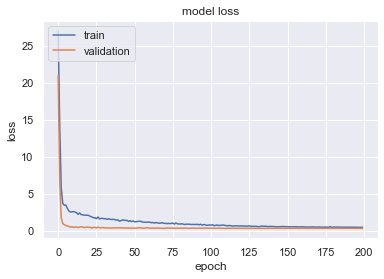

In [317]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [318]:
y_pred = model1.predict(X_test)
mean_squared_error(y_test, y_pred)

0.4065575532023555

<b>Observations:</b>The model above has shown some improvement in the accuracy when compared with the pca model above

In [319]:
model.save("ModelTrainedOnPC.h5")

In [320]:
model1.save("Model.h5")